# Rubin and Roman Filter Transmissions

Data from https://svo2.cab.inta-csic.es/ 
and https://github.com/romanSpaceTelescope/roman-technical-information
and https://github.com/lsst/throughputs

In [5]:
from matplotlib import pyplot as plt 
import numpy as np
from os import path
from astropy.table import Table
from astropy.io import ascii

Load the data files with filter transmission data for the Rubin and Roman filters

In [14]:
data_dir = './data/'

data_files = {
    'u': 'LSST_u.dat',
    'g': 'LSST_g.dat',
    'r': 'LSST_r.dat',
    'i': 'LSST_i.dat',
    'z': 'LSST_z.dat',
    'y': 'LSST_y.dat',
    'F062': 'Roman_WFI_F062.dat',
    'F087': 'Roman_WFI_F087.dat',
    'F106': 'Roman_WFI_F106.dat',
    'F129': 'Roman_WFI_F129.dat',
    'F146': 'Roman_WFI_F146.dat',
    'F158': 'Roman_WFI_F158.dat',
    'F184': 'Roman_WFI_F184.dat',
    'F213': 'Roman_WFI_F213.dat',
    'P127': 'Roman_WFI_Prism.dat',
    'G150': 'Roman_WFI_Grism.dat'
}

In [15]:
transmission_data = {}
for f, file_name in data_files.items():
    transmission_data[f] = ascii.read(path.join(data_dir, file_name))

Plotting configuration

In [16]:
PLOT_COLORS = {
    "F062": "#5f038c",
    "F087": "#3303ab",
    "F106": "#0344a6",
    "F129": "#04b8ac",
    "F158": "#058c01",
    "F184": "#ab6902",
    "F213": "#7a0701",
    "F146": "#7d039c",
    "G150": "#080f17",
    "P127": "#333033",
    "u": "#6000ac",
    "g": "#0070ac",
    "r": "#e7d200",
    "i": "#e79a00",
    "z": "#9c1e02",
    "y": "#5d0018"
  }

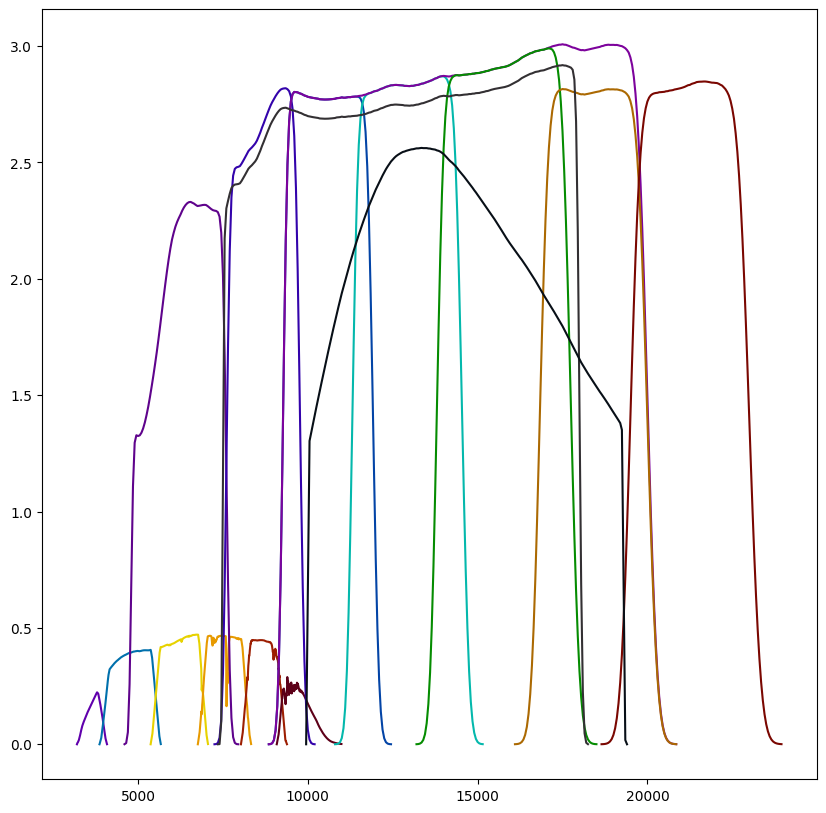

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

for f, data, in transmission_data.items():
    if data['col2'].
    ax.plot(data['col1'], data['col2'], c=PLOT_COLORS[f], ls='-')

plt.show()